In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
csv_file = "../build/timing.csv"

In [75]:
# Plot a particular step
def plot_step(csv_file, column='Average', tag='', step=-1, op='mean'):
    # Read
    data = pd.read_csv(csv_file)
    
    if (step >= 0):
        data = data[data['Step'] == step]
    
    if (tag != ''):
        data = data[data['Tag'] == tag]
    
    data = data.groupby(['Key','Tag'], as_index=False)
    if (op == 'mean'):
        data = data.mean()
    elif (op == 'max'):
        data = data.max()
        
    data['label'] = data['Tag'] + '-' + data['Key']

    plt.bar(data['label'], data[column])

    plt.ylabel(column + ' time (in milliseconds)')
    
    title = column + ' timings across newton iterations'
    if (step >= 0):
        title += ' for timestep ' + str(step)
    else:
        if (op == 'mean'):
            title += ' averaged'
        elif (op == 'max'):
            title += ' max'
        title += ' over all timesteps '
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

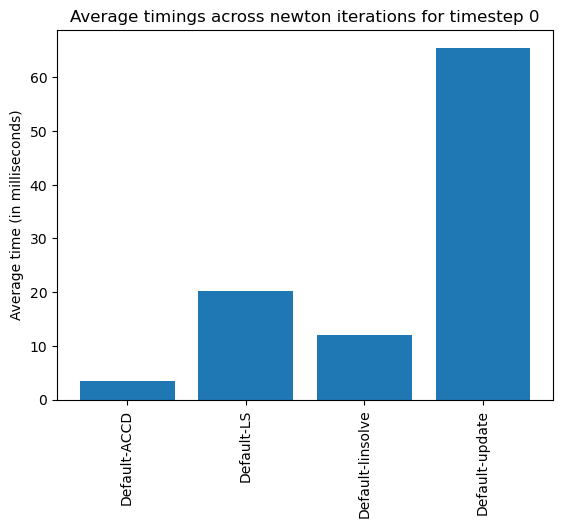

In [76]:
plot_step(csv_file, step=0, column='Average', tag='Default')

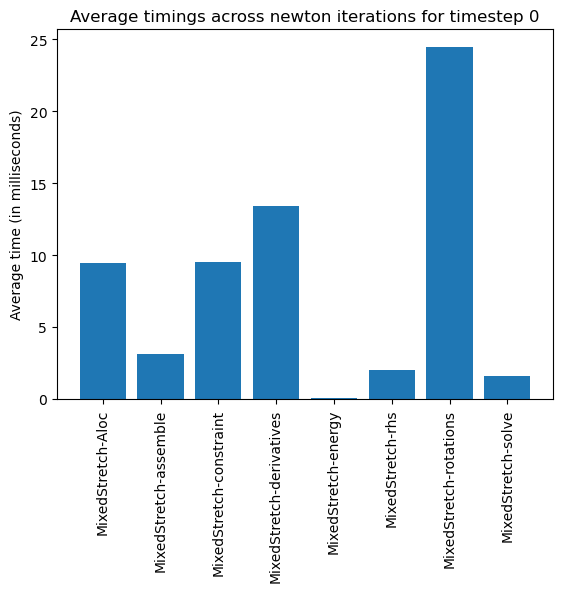

In [72]:
plot_step(csv_file, step=0, column='Average', tag='MixedStretch')

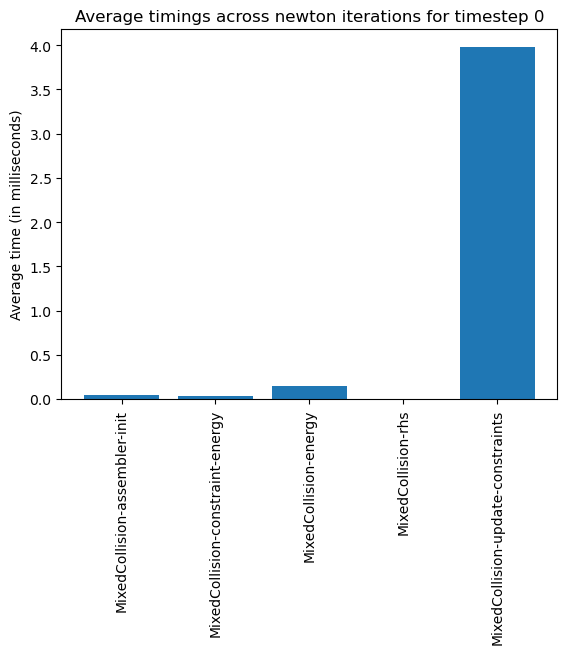

In [73]:
plot_step(csv_file, step=0, column='Average', tag='MixedCollision')

UnboundLocalError: local variable 'titled' referenced before assignment

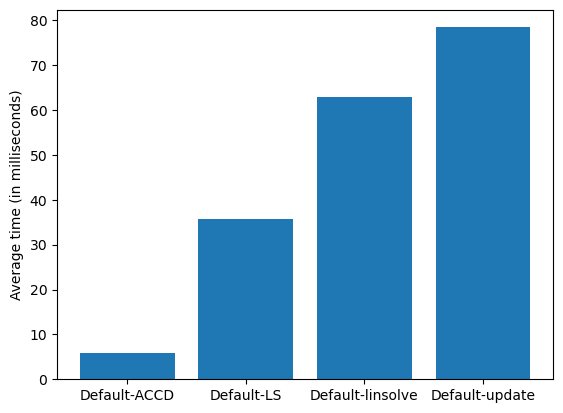

In [74]:
plot_step(csv_file, column='Average', tag='Default')


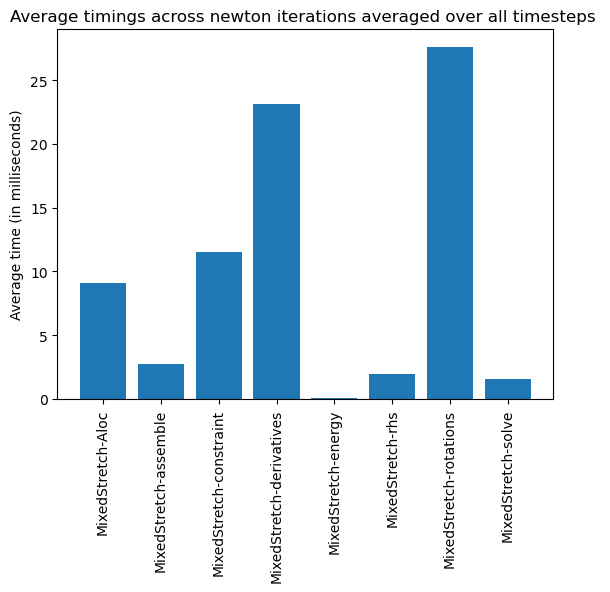

In [77]:
plot_step(csv_file, column='Average', tag='MixedStretch')

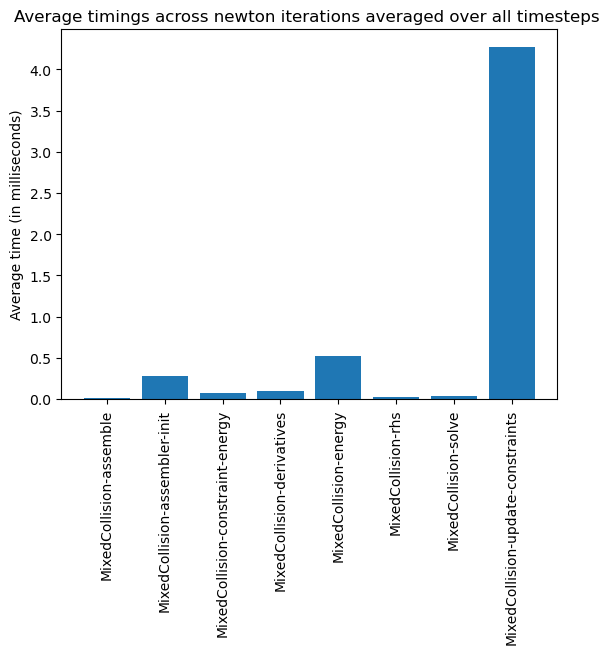

In [78]:
plot_step(csv_file, column='Average', tag='MixedCollision')

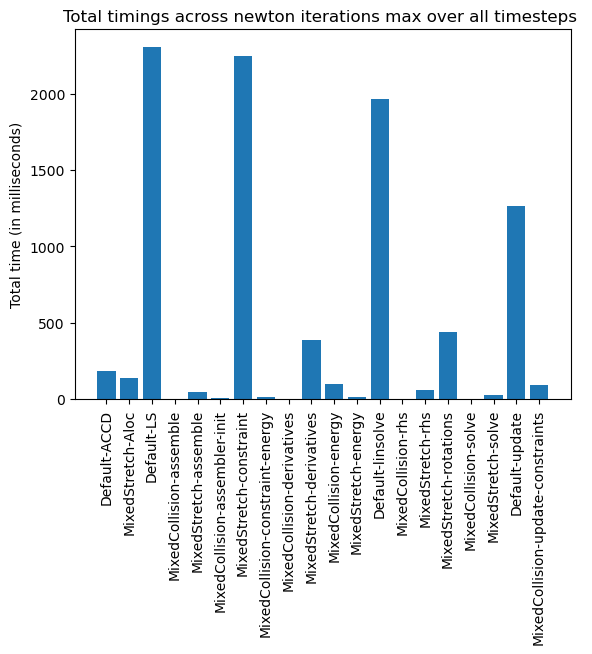

In [79]:
plot_step(csv_file, column='Total', tag='', step=-1, op='max')